#Задание
**Цель:**

Вспомнить и применить знания, полученные на протяжении всего курса. Получить полноценную работу, объединяющую в себе основные методики по работе с данными и алгоритмы машинного обучения.

**Описание задания:**

В лабораторной работе предлагается решить задачу классификации. Данные для выполнения работы можно скачать по [ссылке](https://archive.ics.uci.edu/ml/datasets/Flags), нажав на Data Folder. В датасете находится информация о флаге и базовых показателях страны. На основе доступной информации решается задача классификации стран по религии. Целевой признак мультиклассовый – religion. Остальные признаки описывают характерные черты флага и самой страны. Подробное описание признаков и их возможные значения можно прочесть на сайте.

**1) Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)**

**Flags Data Set**

1. name: Name of the country concerned
2. landmass: 1=N.America, 2=S.America, 3=Europe, 4=Africa, 4=Asia, 6=Oceania
3. zone: Geographic quadrant, based on Greenwich and the Equator; 1=NE, 2=SE, 3=SW, 4=NW
4. area: in thousands of square km
5. population: in round millions
6. language: 1=English, 2=Spanish, 3=French, 4=German, 5=Slavic, 6=Other Indo-European, 7=Chinese, 8=Arabic, 9=Japanese/Turkish/Finnish/Magyar, 10=Others
7. religion: 0=Catholic, 1=Other Christian, 2=Muslim, 3=Buddhist, 4=Hindu, 5=Ethnic, 6=Marxist, 7=Others
8. bars: Number of vertical bars in the flag
9. stripes: Number of horizontal stripes in the flag
10. colours: Number of different colours in the flag
11. red: 0 if red absent, 1 if red present in the flag
12. green: same for green
13. blue: same for blue
14. gold: same for gold (also yellow)
15. white: same for white
16. black: same for black
17. orange: same for orange (also brown)
18. mainhue: predominant colour in the flag (tie-breaks decided by taking the topmost hue, if that fails then the most central hue, and if that fails the leftmost hue)
19. circles: Number of circles in the flag
20. crosses: Number of (upright) crosses
21. saltires: Number of diagonal crosses
22. quarters: Number of quartered sections
23. sunstars: Number of sun or star symbols
24. crescent: 1 if a crescent moon symbol present, else 0
25. triangle: 1 if any triangles present, 0 otherwise
26. icon: 1 if an inanimate image present (e.g., a boat), otherwise 0
27. animate: 1 if an animate image (e.g., an eagle, a tree, a human hand) present, 0 otherwise
28. text: 1 if any letters or writing on the flag (e.g., a motto or slogan), 0 otherwise
29. topleft: colour in the top-left corner (moving right to decide tie-breaks)
30. botright: Colour in the bottom-left corner (moving left to decide tie-breaks)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
flag = pd.read_csv('flag.data', header = None, names = ['name','landmass', 'zone', 'area', 'population', 
                                                        'language', 'religion', 'bars', 'stripes', 'colours',
                                                        'red', 'green', 'blue', 'gold', 'white', 'black',
                                                        'orange', 'mainhue', 'circles', 'crosses', 'saltires',
                                                        'quarters', 'sunstars', 'crescent', 'triangle', 'icon',
                                                        'animate', 'text', 'topleft', 'botright']) 

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
flag.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,red,green,blue,gold,white,black,orange,mainhue,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,1,1,0,1,1,1,0,green,0,0,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red


**2) Проведите первичный разведочный анализ данных.**

a) Проверьте данные на пропуски.

Посмотрим основные стастиски для числовых и категориальных переменных

In [ ]:
flag.describe()

,landmass,zone,area,population,language,religion,bars,stripes,colours,red,green,blue,gold,white,black,orange,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,3.572165,2.211340,700.046392,23.268041,5.340206,2.190722,0.453608,1.551546,3.463918,0.788660,0.469072,0.510309,0.469072,0.752577,0.268041,0.134021,0.170103,0.149485,0.092784,0.149485,1.386598,0.056701,0.139175,0.252577,0.201031,0.082474
std,1.553018,1.308274,2170.927932,91.934085,3.496517,2.061167,1.038339,2.328005,1.300154,0.409315,0.500334,0.501187,0.500334,0.432631,0.444085,0.341556,0.463075,0.385387,0.290879,0.435860,4.396186,0.231869,0.347025,0.435615,0.401808,0.275798
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,9.000000,0.000000,2.000000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,2.000000,111.000000,4.000000,6.000000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,4.000000,471.250000,14.000000,9.000000,4.000000,0.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.750000,0.000000,0.000000
max,6.000000,4.000000,22402.000000,1008.000000,10.000000,7.000000,5.000000,14.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,2.000000,1.000000,4.000000,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
flag.describe(include = 'object')

,name,mainhue,topleft,botright
count,194,194,194,194
unique,194,8,7,8
top,Afghanistan,red,red,red
freq,1,71,56,69


In [ ]:
flag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        194 non-null    object
 1   landmass    194 non-null    int64 
 2   zone        194 non-null    int64 
 3   area        194 non-null    int64 
 4   population  194 non-null    int64 
 5   language    194 non-null    int64 
 6   religion    194 non-null    int64 
 7   bars        194 non-null    int64 
 8   stripes     194 non-null    int64 
 9   colours     194 non-null    int64 
 10  red         194 non-null    int64 
 11  green       194 non-null    int64 
 12  blue        194 non-null    int64 
 13  gold        194 non-null    int64 
 14  white       194 non-null    int64 
 15  black       194 non-null    int64 
 16  orange      194 non-null    int64 
 17  mainhue     194 non-null    object
 18  circles     194 non-null    int64 
 19  crosses     194 non-null    int64 
 20  saltires  

Пропущенных значений нет

b) Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака).

In [ ]:
integer_columns = flag.select_dtypes(include=['int64'])

In [ ]:
integer_columns = integer_columns.drop('religion', axis = 1)

In [ ]:
integer_columns.columns

Index(['landmass', 'zone', 'area', 'population', 'language', 'bars', 'stripes',
       'colours', 'red', 'green', 'blue', 'gold', 'white', 'black', 'orange',
       'circles', 'crosses', 'saltires', 'quarters', 'sunstars', 'crescent',
       'triangle', 'icon', 'animate', 'text'],
      dtype='object')

In [ ]:
columns = ['landmass', 'zone', 'area', 'population', 'language', 'bars', 'stripes',
       'colours', 'red', 'green', 'blue', 'gold', 'white', 'black', 'orange',
       'circles', 'crosses', 'saltires', 'quarters', 'sunstars', 'crescent',
       'triangle', 'icon', 'animate', 'text']

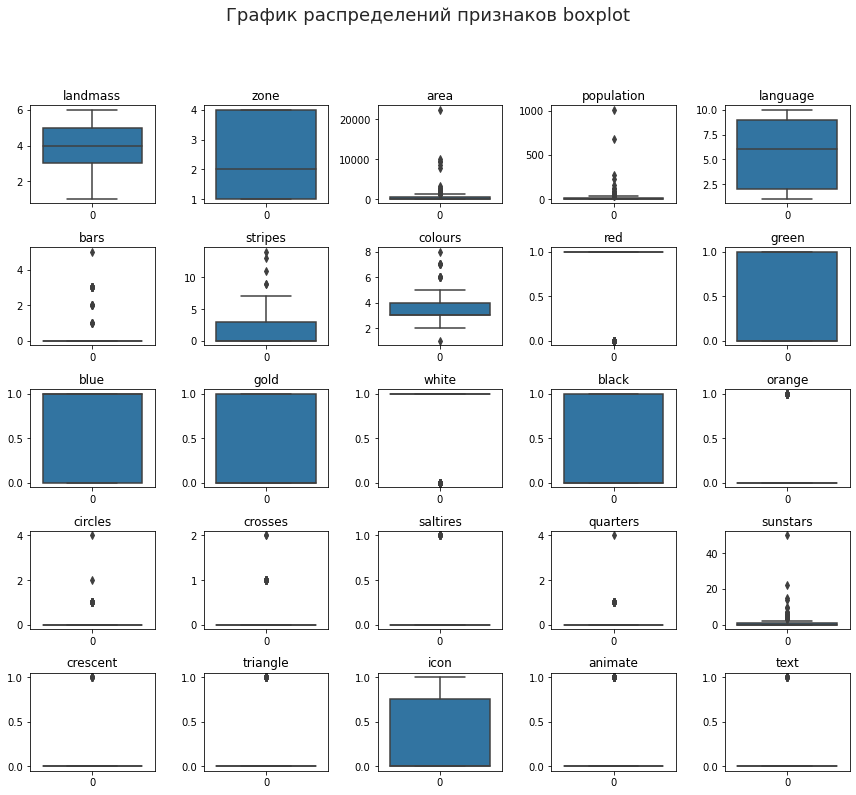

In [ ]:
fig, axs = plt.subplots(5, 5, figsize=(12,10))
sns.set_style('darkgrid')
fig.suptitle('График распределений признаков boxplot', y= 1.1, fontsize=18)
for ax ,column in zip(axs.flat,columns):
    sns.boxplot(ax = ax, data = integer_columns[column])
    ax.set_title(column)
fig.tight_layout()    

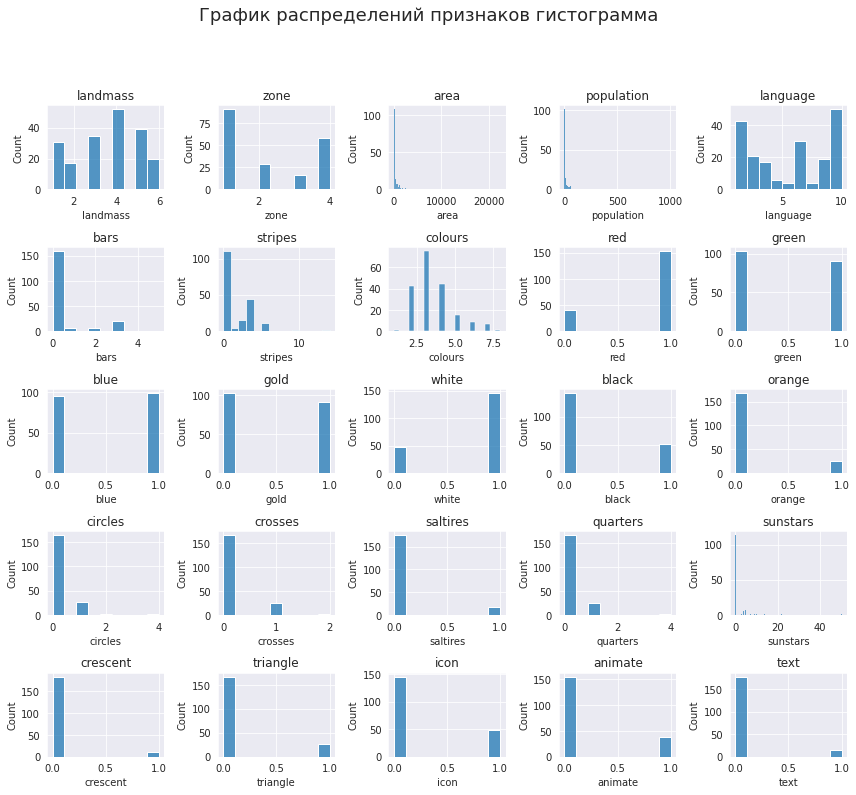

In [ ]:
fig, axs = plt.subplots(5, 5, figsize=(12,10))
sns.set_style('darkgrid')
fig.suptitle('График распределений признаков гистограмма', y= 1.1, fontsize=18)
for ax ,column in zip(axs.flat,columns):
    sns.histplot(ax = ax, data = integer_columns[column])
    ax.set_title(column)
fig.tight_layout()

По данным визуализациям можно сделать вывод о распределии признаков и наличии в них выбросов. Признаки популяция и площадь которые ровняются 0 не я вляются выбросами, так как у нас округленные данные(1 млн и 1000 соответственно). То есть у этих стран популяция меньше 1 млн и площадь меньше 1000 кв.км   

c) Визуализируйте распределение количества флагов по религиям

In [ ]:
religion = flag['religion'].replace({0:'Catholic', 1:'Other Christian',
                                     2:'Muslim', 3:'Buddhist', 4:'Hindu', 
                                     5:'Ethnic', 6:'Marxist', 7:'Others'})

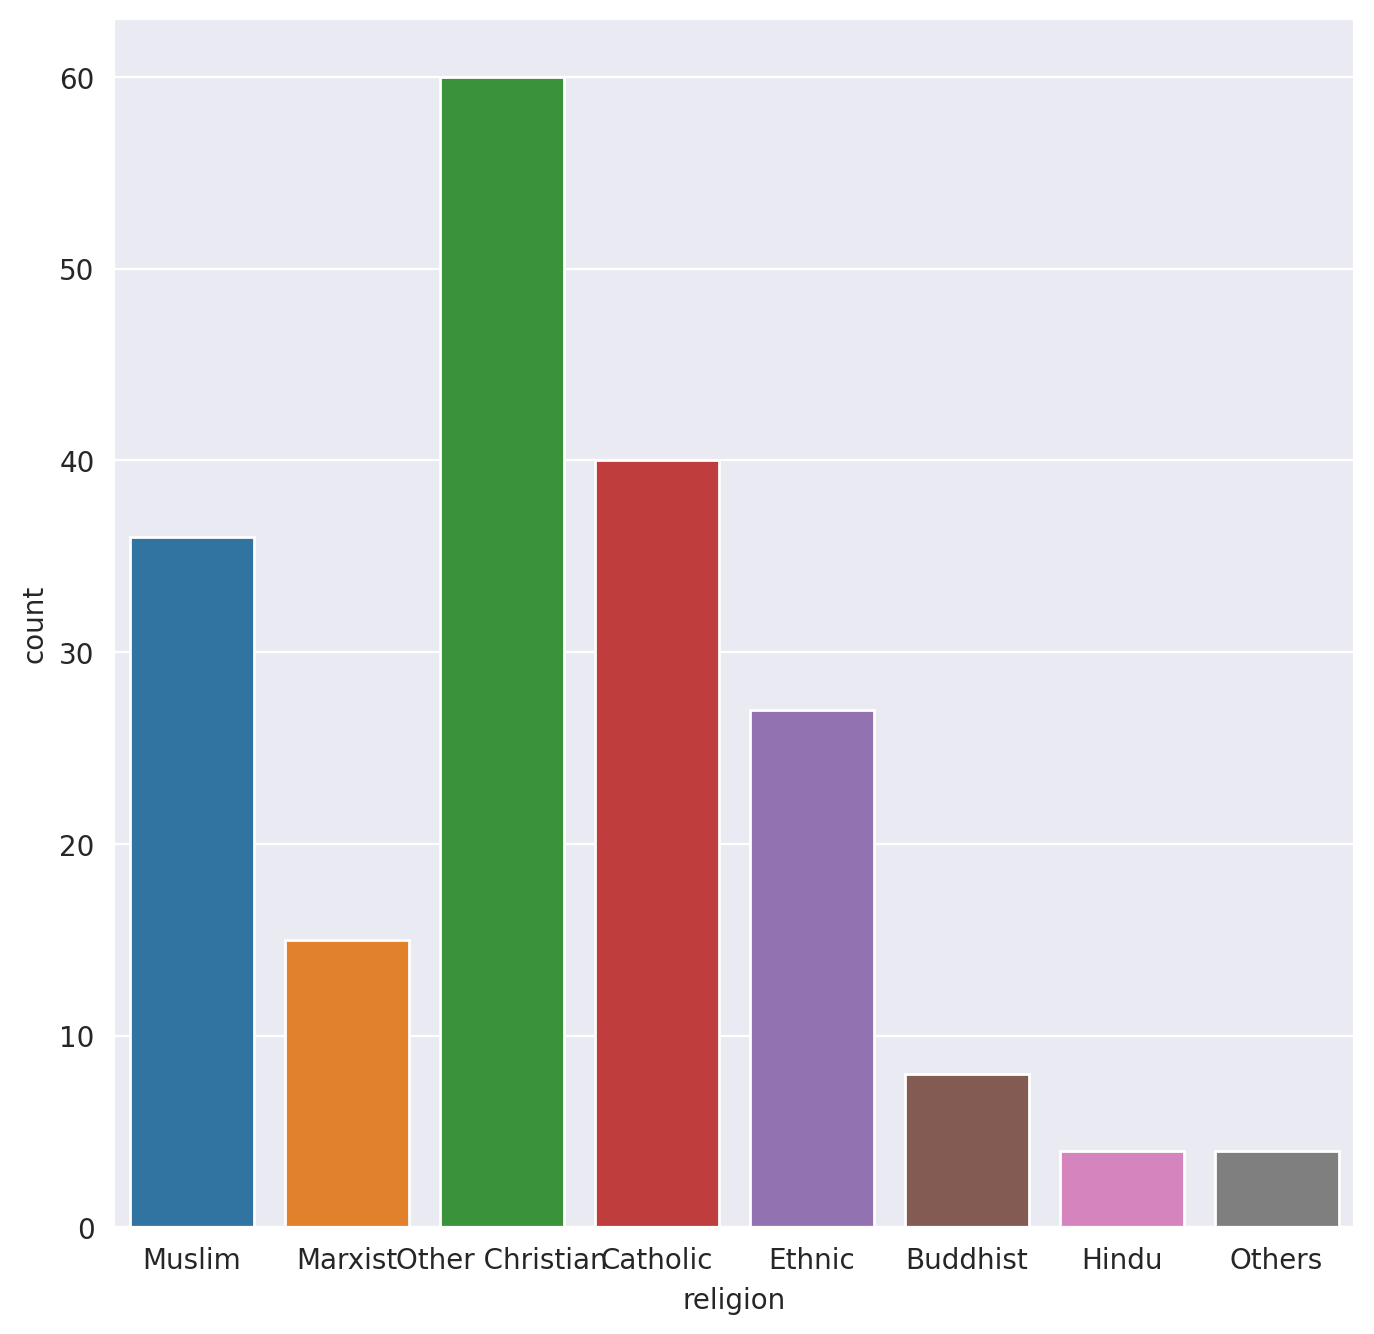

In [ ]:
plt.figure(figsize=(8,8), dpi=200)
sns.countplot(x = religion)

**3)Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.**

Преобразуем категориальные переменные и создадим итоговый датафрейм для дальнейшего обучения

In [ ]:
data = pd.get_dummies(flag, columns = ['name', 'mainhue', 'topleft', 'botright'], drop_first = True)

In [ ]:
data.head()

,landmass,zone,area,population,language,religion,bars,stripes,colours,red,green,blue,gold,white,black,orange,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,name_Albania,name_Algeria,name_American-Samoa,name_Andorra,name_Angola,name_Anguilla,name_Antigua-Barbuda,name_Argentina,name_Argentine,name_Australia,name_Austria,name_Bahamas,name_Bahrain,name_Bangladesh,name_Barbados,name_Belgium,name_Belize,name_Benin,name_Bermuda,name_Bhutan,name_Bolivia,name_Botswana,name_Brazil,name_British-Virgin-Isles,name_Brunei,name_Bulgaria,name_Burkina,name_Burma,name_Burundi,name_Cameroon,name_Canada,name_Cape-Verde-Islands,name_Cayman-Islands,name_Central-African-Republic,name_Chad,name_Chile,name_China,name_Colombia,name_Comorro-Islands,name_Congo,name_Cook-Islands,name_Costa-Rica,name_Cuba,name_Cyprus,name_Czechoslovakia,name_Denmark,name_Djibouti,name_Dominica,name_Dominican-Republic,name_Ecuador,name_Egypt,name_El-Salvador,name_Equatorial-Guinea,name_Ethiopia,name_Faeroes,name_Falklands-Malvinas,name_Fiji,name_Finland,name_France,name_French-Guiana,name_French-Polynesia,name_Gabon,name_Gambia,name_Germany-DDR,name_Germany-FRG,name_Ghana,name_Gibraltar,name_Greece,name_Greenland,name_Grenada,name_Guam,name_Guatemala,name_Guinea,name_Guinea-Bissau,name_Guyana,name_Haiti,name_Honduras,name_Hong-Kong,name_Hungary,name_Iceland,name_India,name_Indonesia,name_Iran,name_Iraq,name_Ireland,name_Israel,name_Italy,name_Ivory-Coast,name_Jamaica,name_Japan,name_Jordan,name_Kampuchea,name_Kenya,name_Kiribati,name_Kuwait,name_Laos,name_Lebanon,name_Lesotho,name_Liberia,name_Libya,name_Liechtenstein,name_Luxembourg,name_Malagasy,name_Malawi,name_Malaysia,name_Maldive-Islands,name_Mali,name_Malta,name_Marianas,name_Mauritania,name_Mauritius,name_Mexico,name_Micronesia,name_Monaco,name_Mongolia,name_Montserrat,name_Morocco,name_Mozambique,name_Nauru,name_Nepal,name_Netherlands,name_Netherlands-Antilles,name_New-Zealand,name_Nicaragua,name_Niger,name_Nigeria,name_Niue,name_North-Korea,name_North-Yemen,name_Norway,name_Oman,name_Pakistan,name_Panama,name_Papua-New-Guinea,name_Parguay,name_Peru,name_Philippines,name_Poland,name_Portugal,name_Puerto-Rico,name_Qatar,name_Romania,name_Rwanda,name_San-Marino,name_Sao-Tome,name_Saudi-Arabia,name_Senegal,name_Seychelles,name_Sierra-Leone,name_Singapore,name_Soloman-Islands,name_Somalia,name_South-Africa,name_South-Korea,name_South-Yemen,name_Spain,name_Sri-Lanka,name_St-Helena,name_St-Kitts-Nevis,name_St-Lucia,name_St-Vincent,name_Sudan,name_Surinam,name_Swaziland,name_Sweden,name_Switzerland,name_Syria,name_Taiwan,name_Tanzania,name_Thailand,name_Togo,name_Tonga,name_Trinidad-Tobago,name_Tunisia,name_Turkey,name_Turks-Cocos-Islands,name_Tuvalu,name_UAE,name_UK,name_US-Virgin-Isles,name_USA,name_USSR,name_Uganda,name_Uruguay,name_Vanuatu,name_Vatican-City,name_Venezuela,name_Vietnam,name_Western-Samoa,name_Yugoslavia,name_Zaire,name_Zambia,name_Zimbabwe,mainhue_blue,mainhue_brown,mainhue_gold,mainhue_green,mainhue_orange,mainhue_red,mainhue_white,topleft_blue,topleft_gold,topleft_green,topleft_orange,topleft_red,topleft_white,botright_blue,botright_brown,botright_gold,botright_green,botright_orange,botright_red,botright_white
0,5,1,648,16,10,2,0,3,5,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [ ]:
X = data.drop('religion', axis = 1)

In [ ]:
y = data['religion']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42 )

**4) Обучите любую модель классификации на выбор.**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(random_state=198)

In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=198)

5)Для тестового множества сделайте предсказание целевой переменной. Выведите метрики модели с помощью [metrics.classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html). Можно использовать любой другой альтернативный метод подсчета метрик.

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
pred_rfc = rfc.predict(X_test)

In [ ]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       0.81      0.81      0.81        16
           2       0.33      0.50      0.40         4
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           5       0.44      0.67      0.53         6
           6       1.00      0.20      0.33         5

    accuracy                           0.62        39
   macro avg       0.47      0.43      0.40        39
weighted avg       0.65      0.62      0.59        39



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**6)Посчитайте и выведите корреляционную матрицу. Убедитесь, что ячейки матрицы поделены на цветные категории, в ячейках указано числовое значение корреляции.**

a) Сделайте выводы.

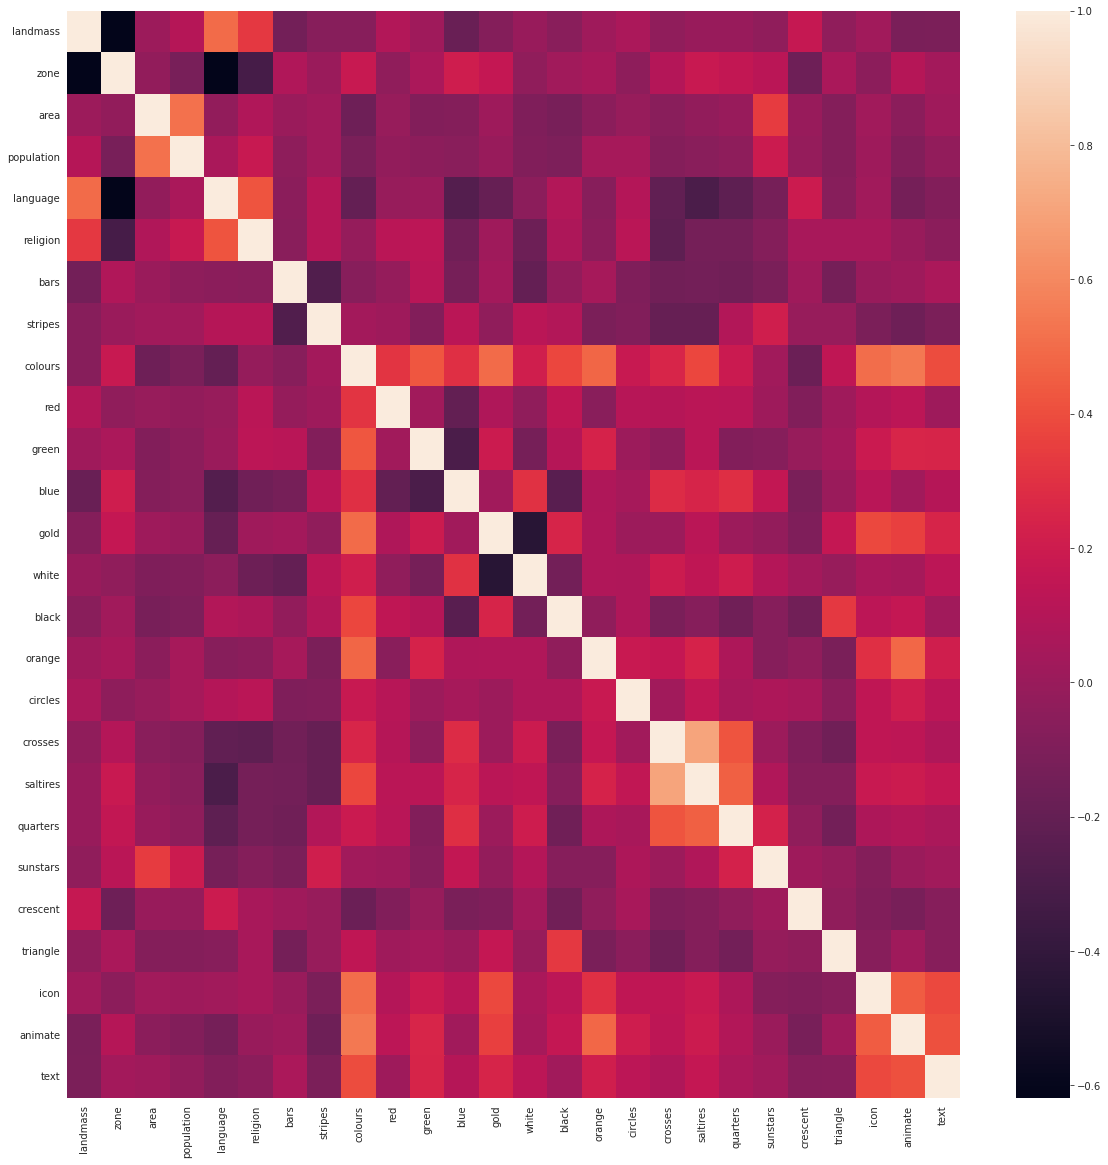

In [ ]:
plt.figure(figsize=(20,20))
corr = flag.corr()
sns.heatmap(corr)

Есть достаточно сильная корреляция между площадью и населением , количеством цветов флага с признаками отдельных цветов, площадью суши и языка, а так же самая сильная корреляция нашей целевой переменной religion с переменной language

**7)Обработайте выбросы в данных.**

a) Визуализируйте распределение значений для каждой переменной. Можно использовать функции sns.boxplot, sns.distplot.

b) Исследуйте признаки на выбросы. Удалите выбросы, если они были найдены/вы считаете это необходимым.

Было сделано ранее. Выбросы не обнаружены

**8)Проведите нормализацию признаков.**


a) Выберите признаки для нормализации, предложите способы для их обработки.

Нормализуем признаки с самыми большими максимальными значениями:
area, population

In [ ]:
data['area_norm']=(data['area']-data['area'].min())/(data['area'].max()-data['area'].min())

In [ ]:
data['population_norm']=(data['population']-data['population'].min())/(data['population'].max()-data['population'].min())

**9) Повторите п. 4, п. 5.**

In [ ]:
X = data.drop(['religion','area','population'], axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42 )

In [ ]:
rfc = RandomForestClassifier(random_state=198)

In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=198)

In [ ]:
pred = rfc.predict(X_test)

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.57      0.80      0.67         5
           1       0.86      0.75      0.80        16
           2       0.38      0.75      0.50         4
           3       0.50      1.00      0.67         1
           4       0.00      0.00      0.00         2
           5       0.57      0.67      0.62         6
           6       1.00      0.20      0.33         5

    accuracy                           0.64        39
   macro avg       0.55      0.60      0.51        39
weighted avg       0.69      0.64      0.62        39



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**10)Сбалансируйте классы путем oversampling/undersampling.**

Так как данных мало используем oversampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
ros = RandomOverSampler()

In [ ]:
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

a) Повторите п. 4, п. 5.

In [ ]:
rfc = RandomForestClassifier(random_state=198)

In [ ]:
rfc.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=198)

In [ ]:
pred = rfc.predict(X_test)

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.57      0.80      0.67         5
           1       0.85      0.69      0.76        16
           2       0.22      0.50      0.31         4
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           5       0.50      0.67      0.57         6
           6       1.00      0.20      0.33         5

    accuracy                           0.56        39
   macro avg       0.45      0.41      0.38        39
weighted avg       0.65      0.56      0.56        39



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**11)Уменьшите размерность пространства признаков.**

Уменьшим признаковое пространство с помощью метода главных компонентов

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components = 70)

In [ ]:
pca.fit(X)

PCA(n_components=70)

In [ ]:
data_pca = pca.transform(X)

a) Повторите п. 4, п. 5.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_pca, y, test_size=0.2, random_state = 42 )

In [ ]:
rfc = RandomForestClassifier(random_state=198)

In [ ]:
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=198)

In [ ]:
pred = rfc.predict(X_test)

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.50      0.60      0.55         5
           1       0.70      1.00      0.82        16
           2       0.29      0.50      0.36         4
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           5       1.00      0.50      0.67         6
           6       0.00      0.00      0.00         5

    accuracy                           0.62        39
   macro avg       0.35      0.37      0.34        39
weighted avg       0.53      0.62      0.55        39



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**12)Примените любой метод на ваше усмотрение для отбора признаков.**

Используем прямой отбор признаков

In [ ]:
from sklearn.feature_selection import SelectFromModel

In [ ]:
rfc = RandomForestClassifier(random_state=198)

In [ ]:
rfc.fit(X, y)

RandomForestClassifier(random_state=198)

In [ ]:
model = SelectFromModel(rfc, prefit=True)
X_for = model.transform(X)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


a) Повторите п. 4, п. 5. Укажите количество выбранных признаков.

In [ ]:
X_for.shape

(194, 39)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_for, y, test_size=0.2, random_state = 42 )

In [ ]:
rfc = RandomForestClassifier(random_state=198)

In [ ]:
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=198)

In [ ]:
pred = rfc.predict(X_test)

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       0.87      0.81      0.84        16
           2       0.33      0.50      0.40         4
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           5       0.50      0.67      0.57         6
           6       1.00      0.20      0.33         5

    accuracy                           0.64        39
   macro avg       0.48      0.45      0.42        39
weighted avg       0.67      0.64      0.61        39



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**13) Оптимизируйте параметры модели из п. 4.**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
import warnings
warnings.simplefilter(action='ignore')

In [ ]:
rfc = RandomForestClassifier(random_state=198)

In [ ]:
param_grid = {'bootstrap': [True, False],
              'max_depth': list(range(1,20)),
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': list(range(1,20)),
              'min_samples_split': list(range(1,20)),
              'n_estimators': [100, 200, 300, 400, 600],
              'class_weight':['balanced', 'balanced_subsample']}

In [ ]:
search  = RandomizedSearchCV(rfc, param_grid, scoring='f1')

In [ ]:
search.fit(X,y)

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=198),
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': ['balanced',
                                                         'balanced_subsample'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15, 16,
                                                             17, 18, 19],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                

In [ ]:
search.best_estimator_

RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=11,
                       min_samples_leaf=16, min_samples_split=12,
                       n_estimators=400, random_state=198)

In [ ]:
rfc = RandomForestClassifier(bootstrap=False, class_weight='balanced_subsample',
                       max_depth=15, max_features='sqrt', min_samples_leaf=14,
                       min_samples_split=13, random_state=198)

In [ ]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, class_weight='balanced_subsample',
                       max_depth=15, max_features='sqrt', min_samples_leaf=14,
                       min_samples_split=13, random_state=198)

In [ ]:
pred_rfc = rfc.predict(X_test)

In [ ]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.67      0.40      0.50         5
           1       0.80      0.50      0.62        16
           2       0.25      0.25      0.25         4
           3       0.33      1.00      0.50         1
           4       0.00      0.00      0.00         2
           5       0.33      0.67      0.44         6
           6       0.50      0.60      0.55         5
           7       0.00      0.00      0.00         0

    accuracy                           0.49        39
   macro avg       0.36      0.43      0.36        39
weighted avg       0.56      0.49      0.49        39



**14)Обучите стекинг трех моделей, включая модель с оптимизированными параметрами.**

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
estimators = [('rfc', RandomForestClassifier(bootstrap=False, class_weight='balanced_subsample',
                       max_depth=15, max_features='sqrt', min_samples_leaf=14,
                       min_samples_split=13, random_state=198)),
              ('knn',KNeighborsClassifier(n_neighbors=5)),
              ('lsvc', LinearSVC(random_state=42))]

In [ ]:
stacking = StackingClassifier(estimators=estimators, final_estimator= RandomForestClassifier())

In [ ]:
stacking.fit(X_train, y_train)

StackingClassifier(estimators=[('rfc',
                                RandomForestClassifier(bootstrap=False,
                                                       class_weight='balanced_subsample',
                                                       max_depth=15,
                                                       max_features='sqrt',
                                                       min_samples_leaf=14,
                                                       min_samples_split=13,
                                                       random_state=198)),
                               ('knn', KNeighborsClassifier()),
                               ('lsvc', LinearSVC(random_state=42))],
                   final_estimator=RandomForestClassifier())

In [ ]:
predict_stacking = stacking.predict(X_test)

In [ ]:
print(classification_report(y_test, predict_stacking))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.75      0.75      0.75        16
           2       0.14      0.25      0.18         4
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           5       0.40      0.67      0.50         6
           6       0.00      0.00      0.00         5

    accuracy                           0.54        39
   macro avg       0.30      0.35      0.32        39
weighted avg       0.49      0.54      0.51        39



**15) Выберите результат с лучшими метриками и постройте для него Confusion Matrix.**

Лучший результат у RandomForestClassifier с параметрами по умолчанию

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, pred_rfc)

array([[2, 1, 0, 0, 0, 0, 2, 0],
       [1, 8, 1, 0, 0, 4, 1, 1],
       [0, 0, 1, 0, 0, 3, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 1, 0, 0],
       [0, 0, 2, 0, 0, 4, 0, 0],
       [0, 0, 0, 2, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]])

*Попробуем оптимизировать параметры вручную*

In [ ]:
ros2 = RandomOverSampler()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42 )

In [ ]:
X_sam, y_sam = ros.fit_resample(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
param = 0
score = 0
for i in range(2,100,2):
  rfc2 = RandomForestClassifier(random_state= 36, max_depth = i)
  rfc2.fit(X_sam, y_sam)
  rfc2_pred = rfc2.predict(X_test)
  sc = accuracy_score(y_test,rfc2_pred)
  if sc > score:
    param = i
    score = sc
print(score, param)    

0.6410256410256411 8


*Перебрав различные параметры в итоге получаем такой результат*

In [ ]:
rfc2 = RandomForestClassifier(random_state=36, max_depth = 10)

In [ ]:
rfc2.fit(X_sam, y_sam)
rfc2_pred = rfc2.predict(X_test)

In [ ]:
print(classification_report(y_test, rfc2_pred))

              precision    recall  f1-score   support

           0       0.57      0.80      0.67         5
           1       0.86      0.75      0.80        16
           2       0.29      0.50      0.36         4
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           5       0.50      0.67      0.57         6
           6       0.67      0.40      0.50         5

    accuracy                           0.62        39
   macro avg       0.41      0.45      0.41        39
weighted avg       0.62      0.62      0.60        39



In [ ]:
confusion_matrix(y_test, rfc2_pred)

array([[ 4,  1,  0,  0,  0,  0,  0],
       [ 1, 12,  2,  0,  0,  1,  0],
       [ 0,  0,  2,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  1,  0],
       [ 0,  0,  2,  0,  0,  4,  0],
       [ 2,  0,  1,  0,  0,  0,  2]])

16) *Творческий пункт. Предложите что-то интересное для датасета 

---



In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

Попробуем перемешивать данные, потом отдельно оверсемплить части и посмотрим на скор

In [ ]:
score = 0
rfc_shaf = RandomForestClassifier(random_state=36, max_depth = 16)
sss = StratifiedShuffleSplit(n_splits = 3, test_size = 0.2, random_state = 0 )
sss.get_n_splits(X, y)
for trn_idx, tst_idx in sss.split(X, y):
    X_train_fold,y_train_fold = X.iloc[trn_idx],y.iloc[trn_idx]
    X_tr, y_tr = ros.fit_resample(X_train_fold, y_train_fold)
    X_tst_fold,y_tst_fold = X.iloc[tst_idx],y.iloc[tst_idx]
    X_tst, y_tst = ros.fit_resample(X_tst_fold,y_tst_fold)
    rfc_shaf.fit(X_tr, y_tr)
    score += rfc_shaf.score(X_tst, y_tst)
print(score/3)


0.4444444444444444


качество предсказания модели заметно снизилось

---



*Модель явно плохо плохо обучилается из-за недостатка данных, так как данных взять больше негде, синтезируем их вручную и обучим модель с синтезированными данными и вручную переберем параметры модели*

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
from collections import Counter

In [ ]:
sm = SMOTE(random_state=42, k_neighbors= 3)

In [ ]:
X_smout, y_smout = sm.fit_resample(X, y)

In [ ]:
Counter(y_smout)

Counter({2: 60, 6: 60, 1: 60, 0: 60, 5: 60, 3: 60, 4: 60, 7: 60})

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_smout, y_smout, test_size=0.2, random_state = 42, stratify= y_smout)

In [ ]:
param = 0
score = 0
for i in range(1,150):
  rfc_smote = RandomForestClassifier(random_state= 8, max_depth= 19, n_estimators = 110 , max_features= i)
  rfc_smote.fit(X_train, y_train)
  rfc_smote_pred = rfc_smote.predict(X_test)
  sc = accuracy_score(y_test,rfc_smote_pred)
  if sc > score:
    param = i
    score = sc
print(score, param) 

0.9375 29


*Обучим модель с самыми лучшими параметрами*

In [ ]:
rfc_smote = RandomForestClassifier(random_state= 8, max_depth= 19, n_estimators = 110, max_features = 29)

In [ ]:
rfc_smote.fit(X_train, y_train)

RandomForestClassifier(max_depth=19, max_features=29, n_estimators=110,
                       random_state=8)

In [ ]:
rfc_smote_pred = rfc_smote.predict(X_test)

Метрики на тестовых данных

In [ ]:
print(classification_report(y_test, rfc_smote_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.91      0.83      0.87        12
           2       1.00      0.92      0.96        12
           3       1.00      1.00      1.00        12
           4       1.00      0.92      0.96        12
           5       0.75      1.00      0.86        12
           6       0.92      0.92      0.92        12
           7       1.00      1.00      1.00        12

    accuracy                           0.94        96
   macro avg       0.95      0.94      0.94        96
weighted avg       0.95      0.94      0.94        96



In [ ]:
pred_train = rfc_smote.predict(X_train)

Скор на тренировочных данных

In [ ]:
accuracy_score(y_train,pred_train)

1.0

In [ ]:
all_predict = rfc_smote.predict(X)

In [ ]:
accuracy_score(y,all_predict)

0.9690721649484536

*CatBoostClassifier*

попробуем CatBoostClassifier без оптимизации параметров




In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 11.6 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
cat = CatBoostClassifier(random_state = 42)

In [ ]:
cat.fit(X_train,y_train)

Learning rate set to 0.075357
0:	learn: 1.9970358	total: 59.7ms	remaining: 59.6s
1:	learn: 1.9214682	total: 70.5ms	remaining: 35.2s
2:	learn: 1.8681874	total: 80.3ms	remaining: 26.7s
3:	learn: 1.8039025	total: 91.5ms	remaining: 22.8s
4:	learn: 1.7435644	total: 102ms	remaining: 20.3s
5:	learn: 1.6971853	total: 112ms	remaining: 18.5s
6:	learn: 1.6551715	total: 122ms	remaining: 17.3s
7:	learn: 1.5962309	total: 137ms	remaining: 17s
8:	learn: 1.5521873	total: 147ms	remaining: 16.2s
9:	learn: 1.5091572	total: 157ms	remaining: 15.5s
10:	learn: 1.4764721	total: 168ms	remaining: 15.1s
11:	learn: 1.4338381	total: 178ms	remaining: 14.7s
12:	learn: 1.3925667	total: 188ms	remaining: 14.3s
13:	learn: 1.3728795	total: 200ms	remaining: 14.1s
14:	learn: 1.3478554	total: 210ms	remaining: 13.8s
15:	learn: 1.3117901	total: 219ms	remaining: 13.5s
16:	learn: 1.2774694	total: 228ms	remaining: 13.2s
17:	learn: 1.2499175	total: 237ms	remaining: 12.9s
18:	learn: 1.2245258	total: 247ms	remaining: 12.8s
19:	learn

In [ ]:
cat_predict = cat.predict(X_test)

In [ ]:
print(classification_report(y_test, cat_predict))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.92      0.80      0.86        15
           2       0.77      0.77      0.77        13
           3       0.88      0.88      0.88         8
           4       1.00      1.00      1.00        15
           5       0.78      0.88      0.82         8
           6       0.79      0.92      0.85        12
           7       1.00      1.00      1.00        15

    accuracy                           0.89        96
   macro avg       0.88      0.88      0.88        96
weighted avg       0.89      0.89      0.89        96



In [ ]:
cat_predict_train = cat.predict(X_train)

In [ ]:
accuracy_score(y_train,cat_predict_train)

1.0